In [8]:
#Basic Libraries
import numpy as np
import pandas as pd
import scipy
from scipy import signal
from scipy.signal import find_peaks, peak_prominences 
from scipy.fft import fft, fftfreq
#Visualizations
import matplotlib.pyplot as plt 
import seaborn as sns
#Statistics
import math
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn import linear_model as lm

# Upload and Plot Raw data

In [9]:
data_df = pd.read_csv('/Users/juliapersche/Desktop/Epitel/data.csv') 
data_df.rename(columns={"38.96277": "Raw Microvolts (mv)"}, inplace=True) 
data_df.tail()

,Raw Microvolts (mv)
307194,0.68093
307195,1.36454
307196,5.46616
307197,8.20058
307198,9.56779


Text(0.5, 1.0, 'Raw Data')

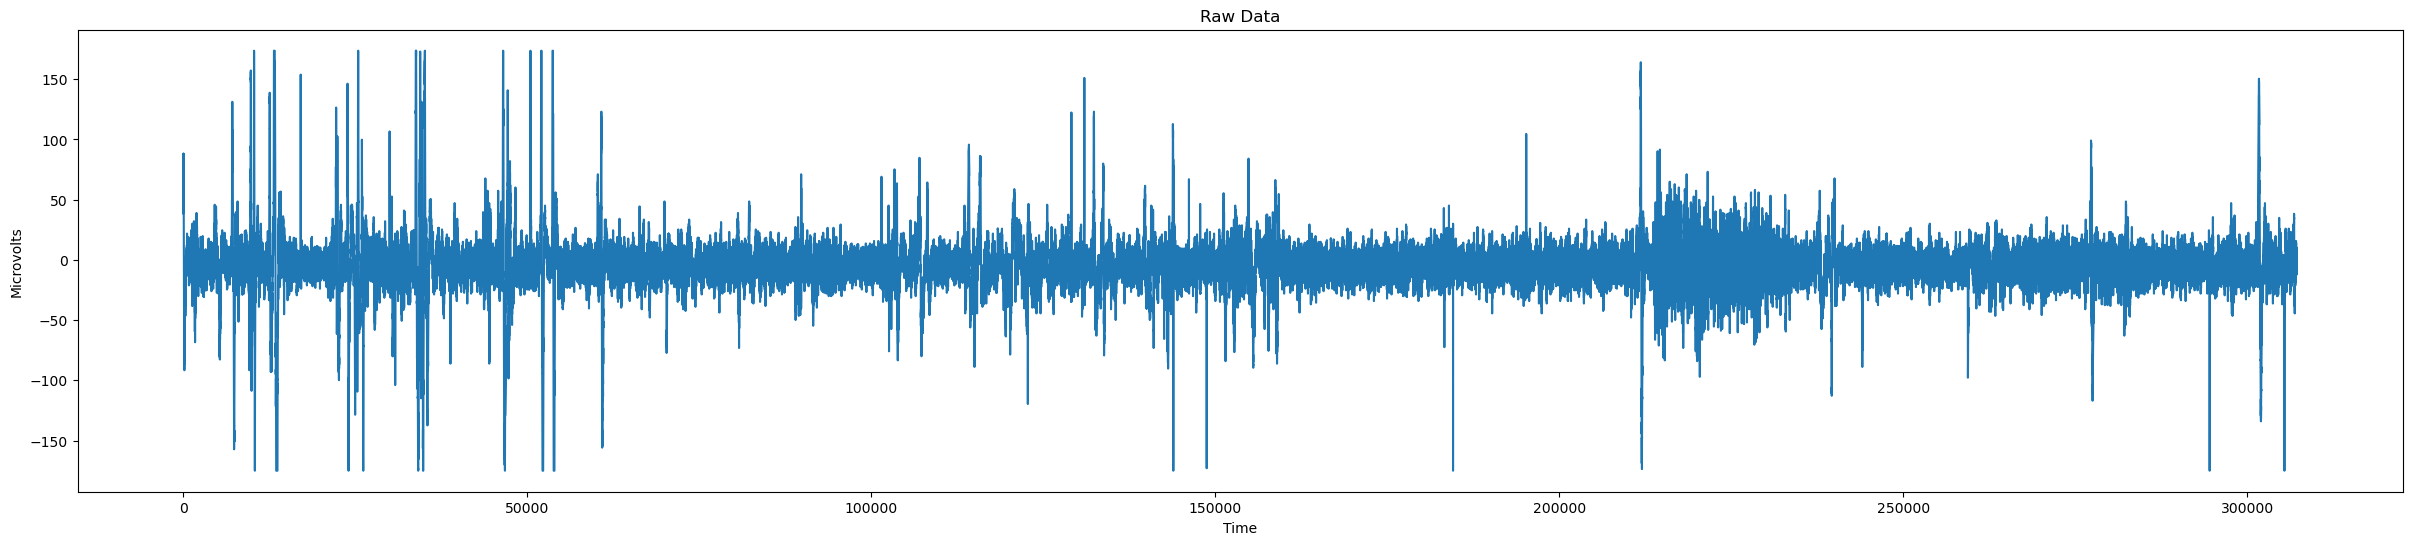

In [10]:
plt.rcParams["figure.figsize"] = [30,6] 
plt.plot(data_df['Raw Microvolts (mv)']) 
plt.ylabel('Microvolts') 
plt.xlabel('Time')
plt.title('Raw Data')

# Figure out sampling rate and location of Absence Seizure event
- Doing this by dividing the total number of samples in the data by the length of the data in seconds (10 minutes * 60 seconds)
- As indicated in the prompt, seizure begins 418 seconds into the recording and ends after 447 seconds 

In [11]:
samples_per_second = len(data_df)/(10*60)

event_begin = round(samples_per_second*418)
event_end = round(samples_per_second*447)

print(samples_per_second)
print(event_begin)
print(event_end)

511.99833333333333
214015
228863


Text(0.5, 1.0, 'Raw Data (mV)')

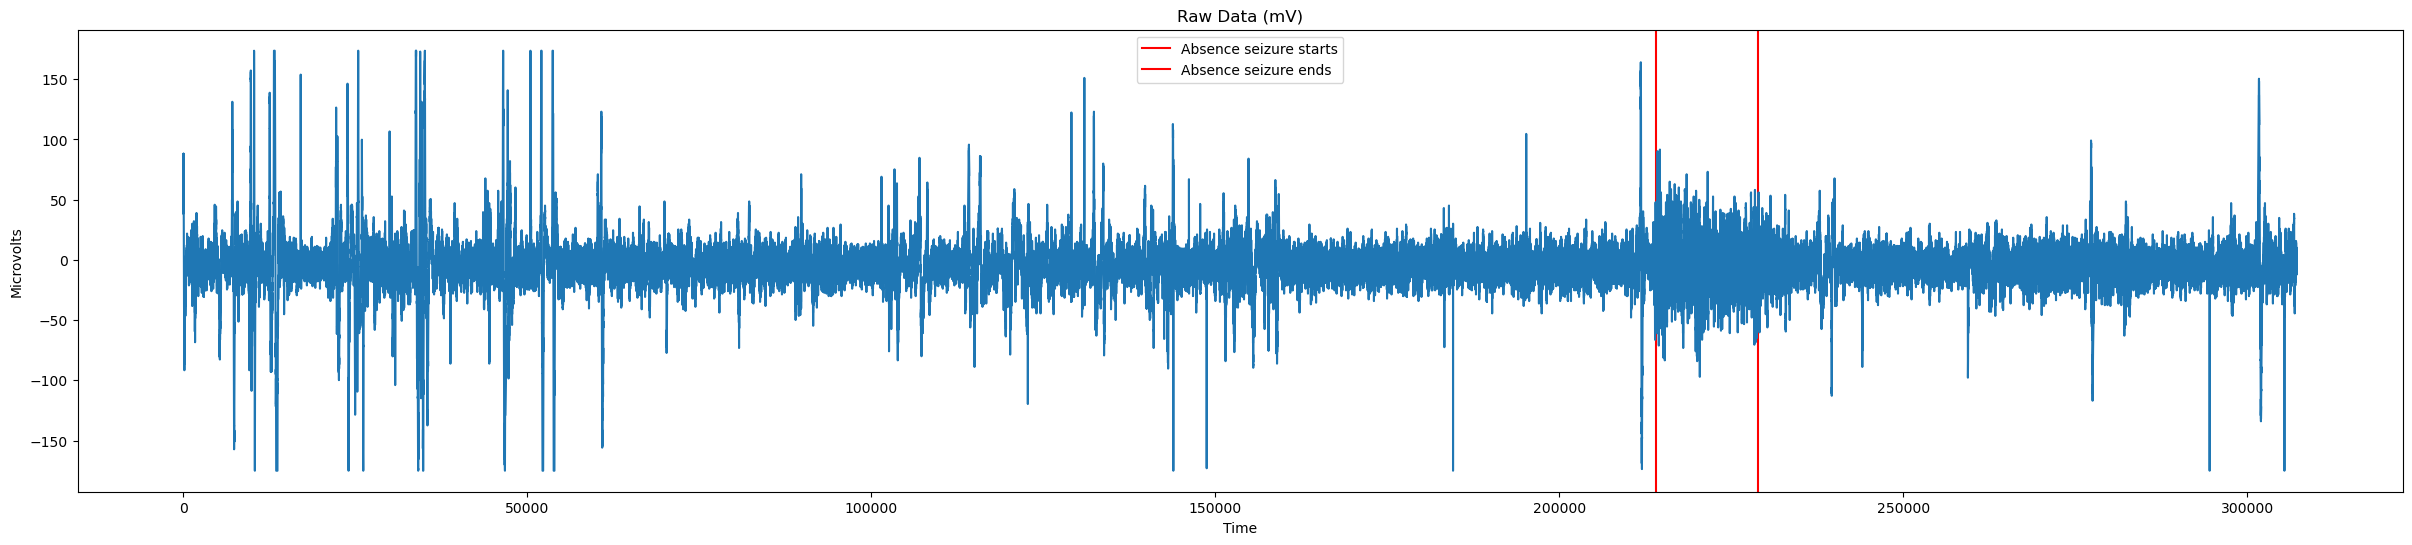

In [12]:
plt.rcParams["figure.figsize"] = [30,6]
plt.axvline(x = event_begin, color = 'r', label = "Absence seizure starts")
plt.axvline(x = event_end, color = 'r', label = "Absence seizure ends")
plt.plot(data_df['Raw Microvolts (mv)'])

plt.legend()
plt.ylabel('Microvolts')
plt.xlabel('Time')
plt.title('Raw Data (mV)')

# Filter Data
- Normalize Signal
- Apply a bandpass filter for the desired range of frequencies 
- Online sources say that Absence Seizures occur within a 2.5 - 6 Hz range 

In [13]:
raw_mv = data_df['Raw Microvolts (mv)']
mv_normalized = (raw_mv  - raw_mv .mean())/ (raw_mv.max()- raw_mv.min())
fs = samples_per_second

In [14]:
signalmv= signal.butter(3, [2.5,6], btype="bandpass", fs=fs, output="sos")
filtered_signalmv = signal.sosfilt(signalmv, raw_mv)
filtered_normalized_signalmv =  signal.sosfilt(signalmv, mv_normalized)


# Visualize Filtered and Raw Data
- In time domain (full signal & windowed)

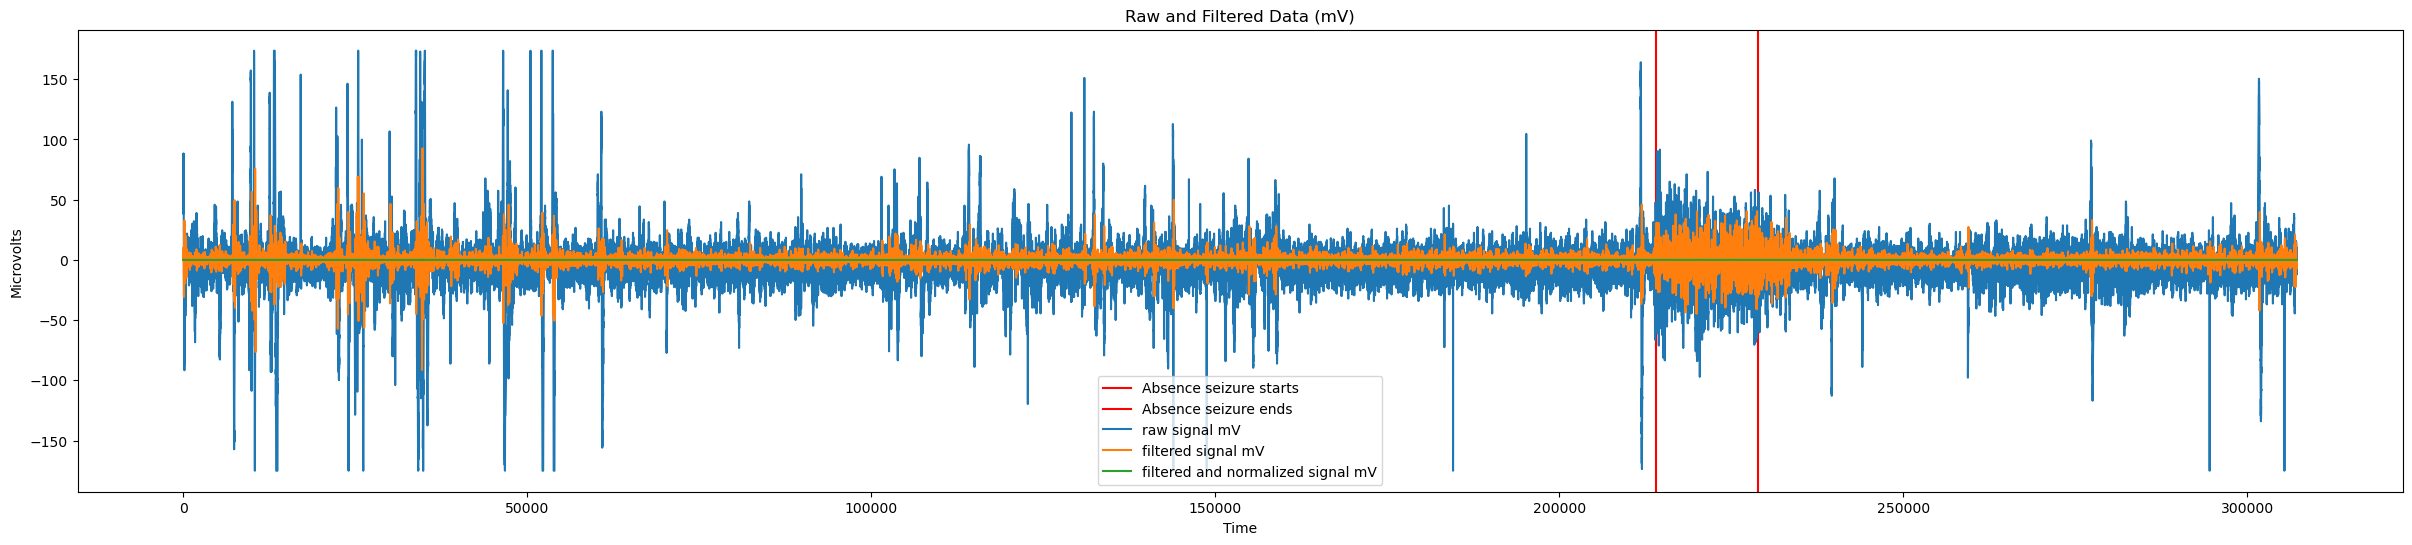

In [15]:
fig,ax = plt.subplots(figsize=(30,6))

#Label beginning and end of seizure event
plt.axvline(x = event_begin, color = 'r', label = "Absence seizure starts")
plt.axvline(x = event_end, color = 'r', label = "Absence seizure ends")


ax.plot(raw_mv[0:len(data_df)],label = 'raw signal mV')
ax.plot(filtered_signalmv[0:len(data_df)], label = 'filtered signal mV')
ax.plot(filtered_normalized_signalmv[0:len(data_df)], label = 'filtered and normalized signal mV')

plt.ylabel('Microvolts')
plt.xlabel('Time')
plt.title('Raw and Filtered Data (mV)')
ax.legend()
plt.show()


# Define window with buffer

In [16]:
event_begin_buffer = round(event_begin - (samples_per_second*30)) 
event_end_buffer = round(event_end + (samples_per_second*30))

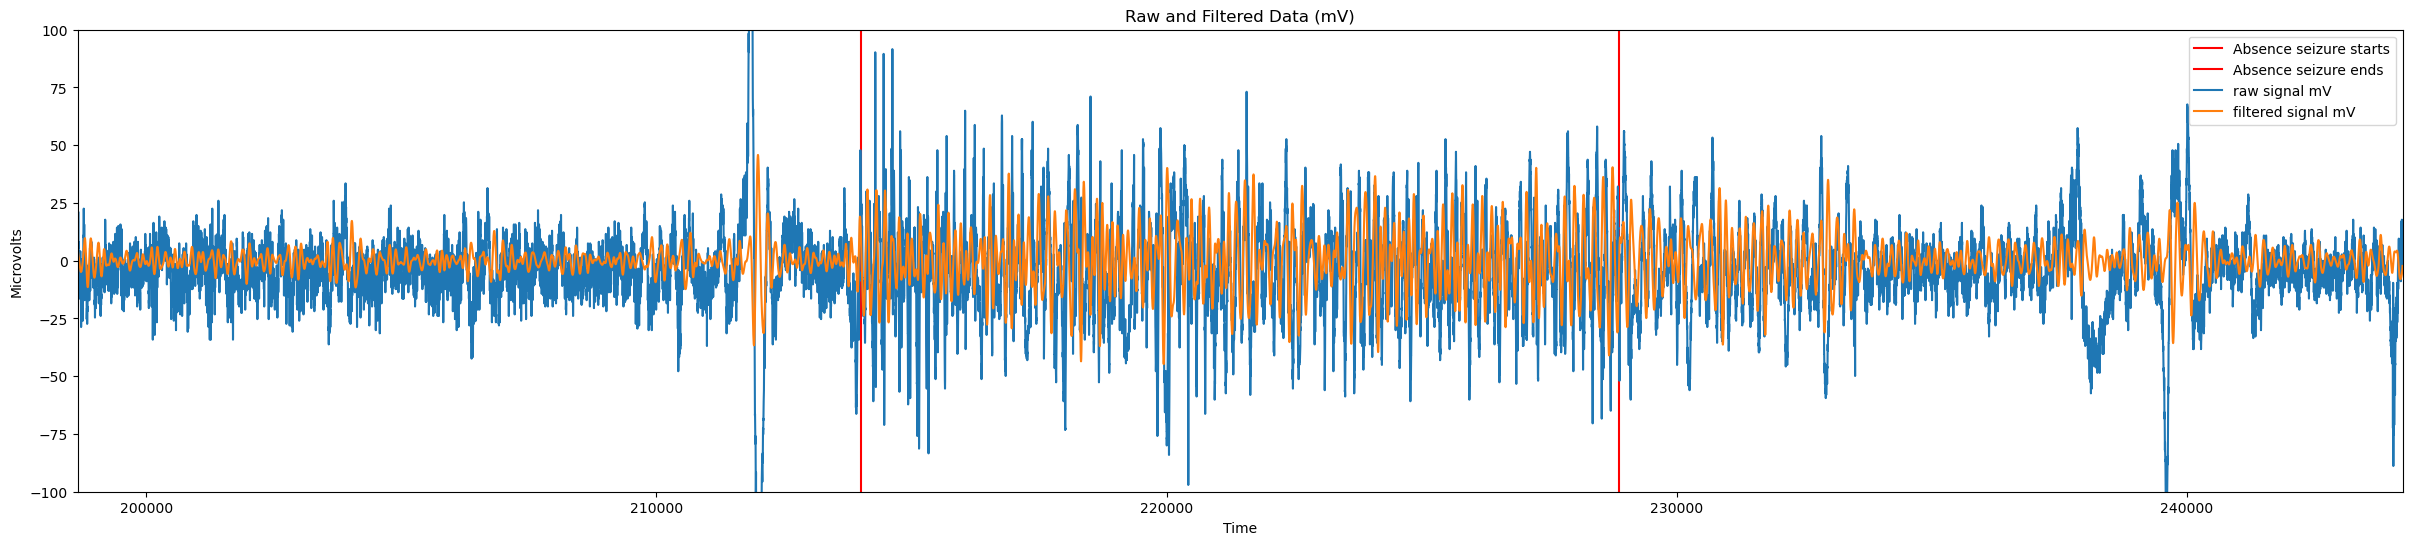

In [17]:
fig,ax = plt.subplots(figsize=(30,6))

#Label beginning and end of seizure event
plt.axvline(x = event_begin, color = 'r', label = "Absence seizure starts") 
plt.axvline(x = event_end, color = 'r', label = "Absence seizure ends")
ax.plot(raw_mv,label = 'raw signal mV') 
ax.plot(filtered_signalmv, label = 'filtered signal mV') 
plt.xlim([event_begin_buffer, event_end_buffer]) 
plt.ylim([-100,100])
plt.ylabel('Microvolts') 
plt.xlabel('Time')
plt.title('Raw and Filtered Data (mV)')
ax.legend() 
plt.show()

# Apply Statistical Methods to Visualize Change in Filtered vs Unfiltered Absence Seizure Signals Method 1:
- Compute range manually: average of max and min 5% of filtered and unfiltered signal
- Visualize on time-series graph Method 2:
- Use fourier transformation to convert time-series signal to frequency domain
- Locate peak frequencies in

In [ ]:
length = event_end - event_begin
Windowed_raw_signal = (raw_mv[event_begin:event_end]).to_numpy() 
Windowed_filtered_signal = filtered_signalmv[event_begin:event_end]
print(length)
print(event_begin_buffer)
print(event_end_buffer)

In [ ]:
#List ordered from lowest to highest
raw_list = Windowed_raw_signal.tolist() 
raw_list.sort()
filtered_list = Windowed_filtered_signal.tolist() 
filtered_list.sort()
top_5 = round(length*.05) 
max5 = length - top_5

In [ ]:
#Compute for Raw Signal
raw_min5 = raw_list[0:top_5] 
raw_max5 = raw_list[max5:length]
raw_signal = "Raw Signal Stats (Top 5% average, Bottom 5% average, Range):" 
raw_average_min5 = sum(raw_min5)/top_5
raw_average_max5 = sum(raw_max5)/top_5
raw_range = abs(raw_average_max5 - raw_average_min5)
print("{} {}, {}, {}".format(raw_signal, 
                             raw_average_min5, 
                             raw_average_max5,
                             raw_range))

#Compute for Filtered Signal
filtered_min5 = filtered_list[0:top_5] 
filtered_max5 = filtered_list[max5:length]
filtered_signal = "Filtered Signal Stats (Top 5% average, Bottom 5% average, Range):" 
filtered_average_min5 = sum(filtered_min5)/top_5
filtered_average_max5 = sum(filtered_max5)/top_5
filtered_range = abs(filtered_average_max5 - filtered_average_min5)
print("{} {}, {}, {}".format(filtered_signal, 
                             filtered_average_min5, 
                             filtered_average_max5,
                             filtered_range))


fig,ax = plt.subplots(figsize=(30,6))
#Label beginning and end of seizure event
plt.axvline(x = event_begin, color = 'r', label = "Absence seizure starts") 
plt.axvline(x = event_end, color = 'r', label = "Absence seizure ends")
ax.plot(data_df['Raw Microvolts (mv)'],label = 'raw signal mV')
plt.axhline(y = raw_average_min5, color = 'aqua',lw=2, linestyle = '--', label = "raw signal: lowest 5%") 
plt.axhline(y = raw_average_max5, color = 'aqua',lw=2, linestyle = '--', label = "raw signal: highest 5%")

ax.plot(filtered_signalmv, label = 'filtered signal mV')
plt.axhline(y = filtered_average_min5, color = 'purple',lw=2, linestyle = '--', label = "filtered signal: lowest 5%") 
plt.axhline(y = filtered_average_max5, color = 'purple',lw=2, linestyle = '--', label = "filtered signal: highest 5%")

#zoom in closer
event_begin_buffer2 = round(event_begin - (samples_per_second*10)) 
event_end_buffer2 = round(event_end + (samples_per_second*10))
plt.xlim([event_begin_buffer2, event_end_buffer2]) plt.ylim([-100,100])
plt.ylabel('Microvolts') plt.xlabel('Time')
plt.title('Raw and Filtered Data (mV)')
ax.legend() 
plt.show()

### Fourier Transformation

In [ ]:
fig,ax = plt.subplots(figsize=(24,6)) plt.xlim([1, 7])
plt.ylim([0, 85000])

#Fourier transformation (raw signal)
y_raw = fft(Windowed_raw_signal)
x_raw = fftfreq(length, 1 / samples_per_second)
ax.plot(x_raw, np.abs(y_raw), color = 'b', label = 'Raw Signal')

#Fourier transformation (Filtered signal)
y_filtered =fft(Windowed_filtered_signal)
xf = fftfreq(length, 1 / samples_per_second)
ax.plot(xf, np.abs(y_filtered), color = 'c', label = 'Filtered Signal')

ax.legend()
plt.ylabel('Microvolts') 
plt.xlabel('Frequency')
plt.title('Raw and Filtered Data (mV)')

#Peak Frequencies(raw Signal)
raw_frequency_peaks, raw_properties = find_peaks(np.abs(y_raw), height= 30000)
plt.plot(x_raw, np.abs(y_raw),'-', x_raw[raw_frequency_peaks],raw_properties['peak_heights'],'x') 
ax.plot(raw_frequency_peaks, y_raw[raw_frequency_peaks], color = 'y', marker="x", label = 'peak raw frequencies') 
plt.legend()

f_raw = "Peak Frequencies(Raw Signal):" 
b = abs(x_raw[raw_frequency_peaks][0:3]) 
print("{}{}".format(f_raw, b))


raw_stats = "Raw Signal Frequency Stats (Max, Min, Range):" 
raw_min = abs(x_raw[raw_frequency_peaks]).min()
raw_max = abs(x_raw[raw_frequency_peaks]).max()
raw_range = raw_max - raw_min
print("{} {}, {}, {}".format(raw_stats, raw_min,
                        raw_max,
                        raw_range))

#Peak Frequencies(Filtered Signal)
frequency_peaks, properties = find_peaks(np.abs(y_filtered), height= 30000)
plt.plot(xf, np.abs(y_filtered),'-', xf[frequency_peaks],properties['peak_heights'],'x')
ax.plot(frequency_peaks, y_filtered[frequency_peaks], color = 'r', marker="x", label = 'peak filtered frequencies') 
plt.legend()

f = "Peak Frequencies(Filtered Signal):" 
a = abs(xf[frequency_peaks][0:3]) 
print("{}{}".format(f, a))

filtered_stats = "Filtered Signal Frequency Stats (Max, Min, Range):" 
filtered_min = abs(xf[frequency_peaks]).min()
filtered_max = abs(xf[frequency_peaks]).max()
filtered_range = filtered_max - filtered_min
print("{} {}, {}, {}".format(filtered_stats, filtered_min,
                        filtered_max,
                        filtered_range))